In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b9596c0b53f523d5f49612e89e67179a158b074c62214613c71db5e19dc68dfe
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.3 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector

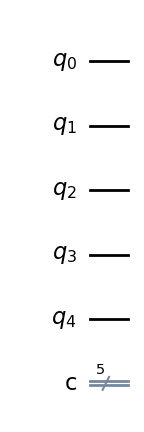

In [3]:
# @title Creating a Quantum Circuit
#declaring the number of registers needed; both registers should always be equal
qr = QuantumRegister(5, 'q') #quantum registers
cr = ClassicalRegister(5, 'c') #classical registers
qc = QuantumCircuit(qr, cr) #creating the circuit with the declared registers
qc.draw('mpl') #plotting the circuit

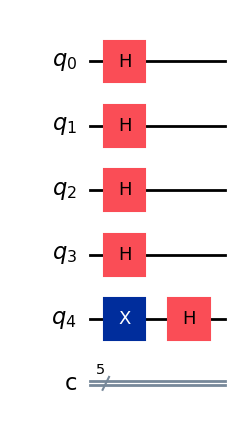

In [4]:
# @title Inserting the First Set of Gates
n = 5 #number of registers
qc.x(qr[n-1]) #applying the X (not) gate to the last register
for i in range(n): #applying the Hadamard (H) gate to all but the last register
  qc.h(qr[i])
qc.draw('mpl') #plotting the circuit

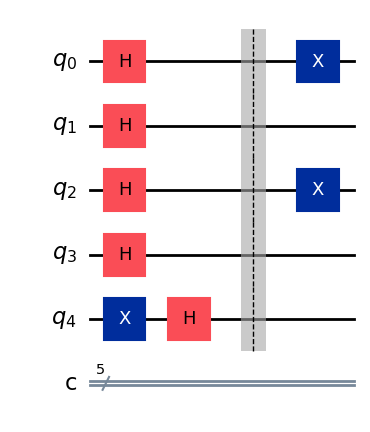

In [5]:
# @title Inserting the Second Set of Gates
qc.barrier(qr[0], qr[1], qr[2], qr[3], qr[4]) #a barrier to group the registers and make it more clear
sv = Statevector(qc) #creating the statevector
qc.x(qr[0]) #applying the X (not) gate to the first register
qc.x(qr[2]) #applying the X (not) gate to the third register
qc.draw('mpl') #plotting the circuit

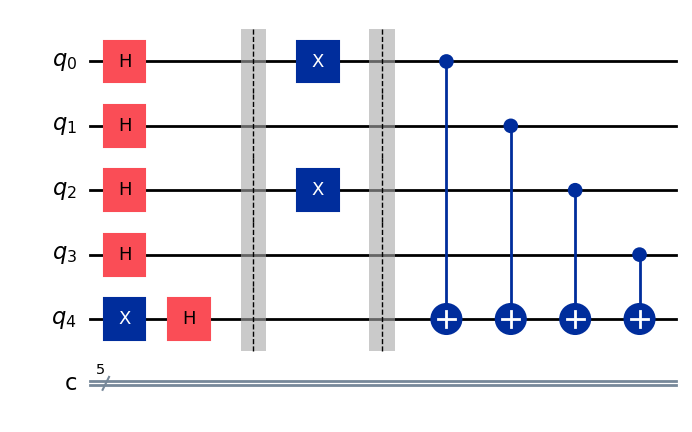

In [6]:
# @title Inserting the Third Set of Gates
qc.barrier(qr[0], qr[1], qr[2], qr[3], qr[4]) #a barrier to group the registers and make it more clear
qc.cx(qr[0], qr[4]) #applying the CNOT gate to the first and fifth register
qc.cx(qr[1], qr[4]) #applying the CNOT gate to the second and fifth register
qc.cx(qr[2], qr[4]) #applying the CNOT gate to the third and fifth register
qc.cx(qr[3], qr[4]) #applying the CNOT gate to the fourth and fifth register
qc.draw('mpl') #plotting the circuit

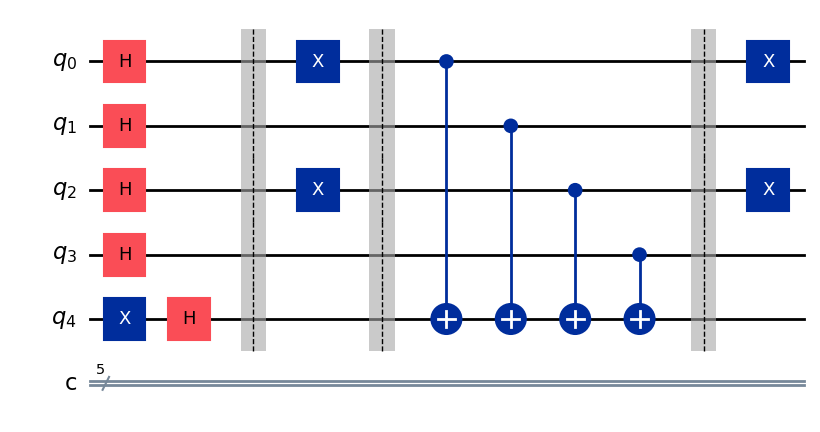

In [7]:
# @title Inserting the Forth Set of Gates
qc.barrier(qr[0], qr[1], qr[2], qr[3], qr[4]) #a barrier to group the registers and make it more clear
qc.x(qr[0]) #applying the X (not) gate to the first register
qc.x(qr[2]) #applying the X (not) gate to the third register
qc.draw('mpl') #plotting the circuit

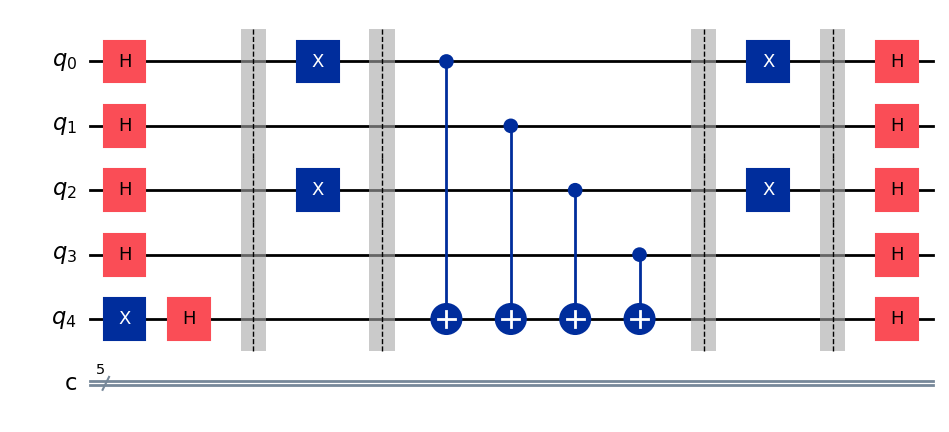

In [8]:
# @title Inserting the Fifth Set of Gates
qc.barrier(qr[0], qr[1], qr[2], qr[3], qr[4]) #a barrier to group the registers and make it more clear
for i in range(n): #applying the Hadamard (H) gate to all but the last register
  qc.h(qr[i])
qc.draw('mpl') #plotting the circuit

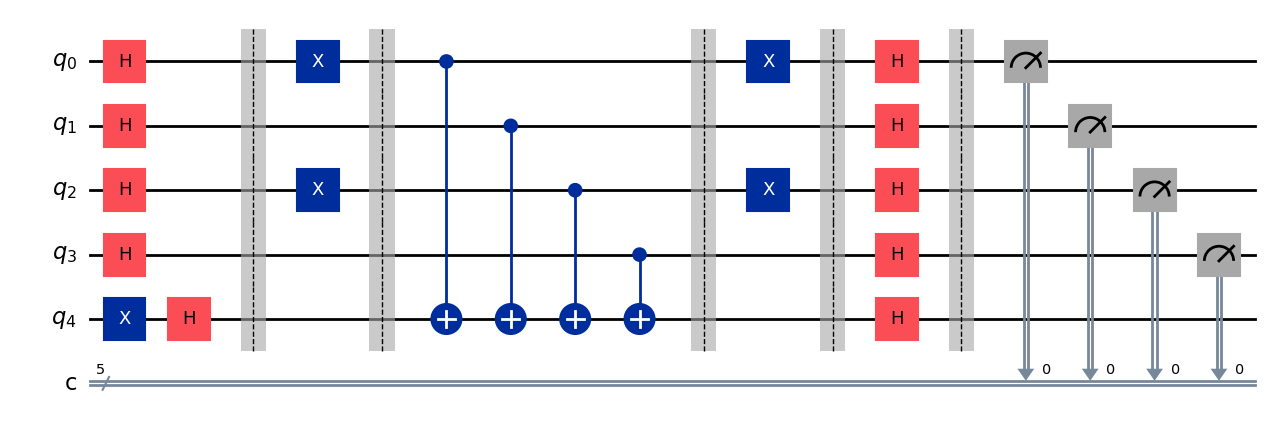

In [9]:

# @title Inserting the Measurements
qc.barrier(qr[0], qr[1], qr[2], qr[3], qr[4]) #a barrier to group the registers and make it more clear
qc.measure(qr[0], cr[0]) #to implement any kind of measurement when combined with gate
qc.measure(qr[1], cr[0]) #to implement any kind of measurement when combined with gate
qc.measure(qr[2], cr[0]) #to implement any kind of measurement when combined with gate
qc.measure(qr[3], cr[0]) #to implement any kind of measurement when combined with gate
qc.draw('mpl') #plotting the circuit

In [10]:
# @title Measuring the Circuit
for i in range(n):
    qc.measure(qr[i],cr[i])

In [11]:
# @title Simulation
from qiskit_aer import AerSimulator
sim = AerSimulator() #creating the simulator
res = sim.run(qc).result().get_counts() #running the circuit
print(res) #printing the results

{'11111': 1024}


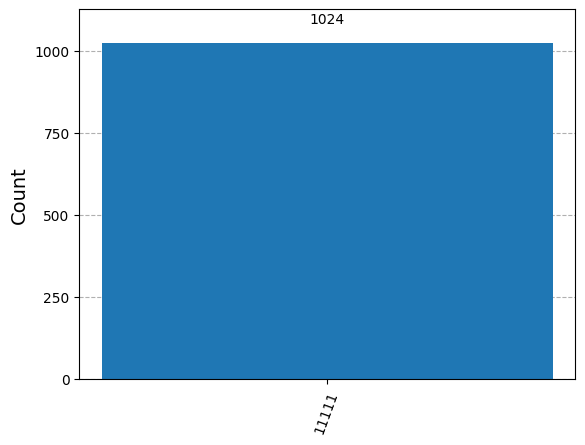

In [12]:
# @title Histogram
from qiskit.visualization import plot_histogram
plot_histogram(res) #plotting the results

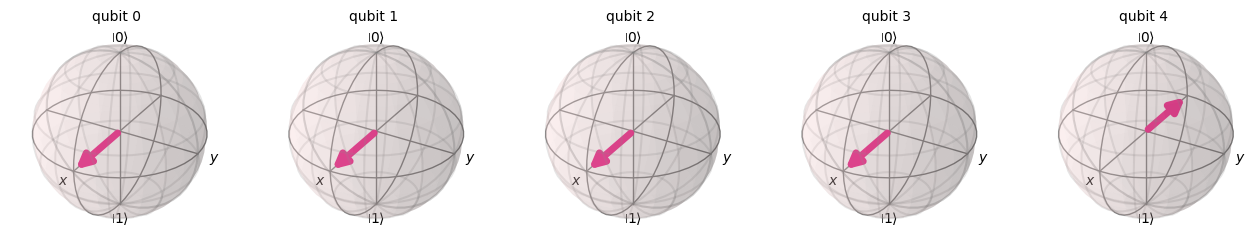

In [13]:
# @title Bloch Sphere
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(sv) #plotting the Bloch Sphere